# Bike Sharing Case Study
## Multiple linear regression model for the prediction of demand for shared bikes.

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
They want to understand the factors affecting the demand for these shared bikes in the American market

Essentially, the company wants —


- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands

- To know the accuracy of the model


## Step 1: Reading and Understanding the Data
Import necessary modules, and understand the dataset

In [1]:
from platform import python_version

In [2]:
import numpy as np
import pandas as pd

In [3]:
df_bike = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Inital Data Cleaning of removing nulls, duplicates etc

In [7]:
#Find nulls
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#Dropping Duplicate Rows
df_bike=df_bike.drop_duplicates()
df_bike.shape

(730, 16)

#### Inference - No Nulls, duplicates.

### Impute values

In [9]:
#Analysing columns one by one. 
#Date column to date
df_bike['dteday'] = pd.to_datetime(df_bike['dteday'], format='%d-%m-%Y')

In [10]:
#convert year column to year

In [11]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

## Step 2: Visualising the Data

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# cnt is our target variable

#### Visualising Numeric Variables
##### Let's make a pairplot of all the numeric variables

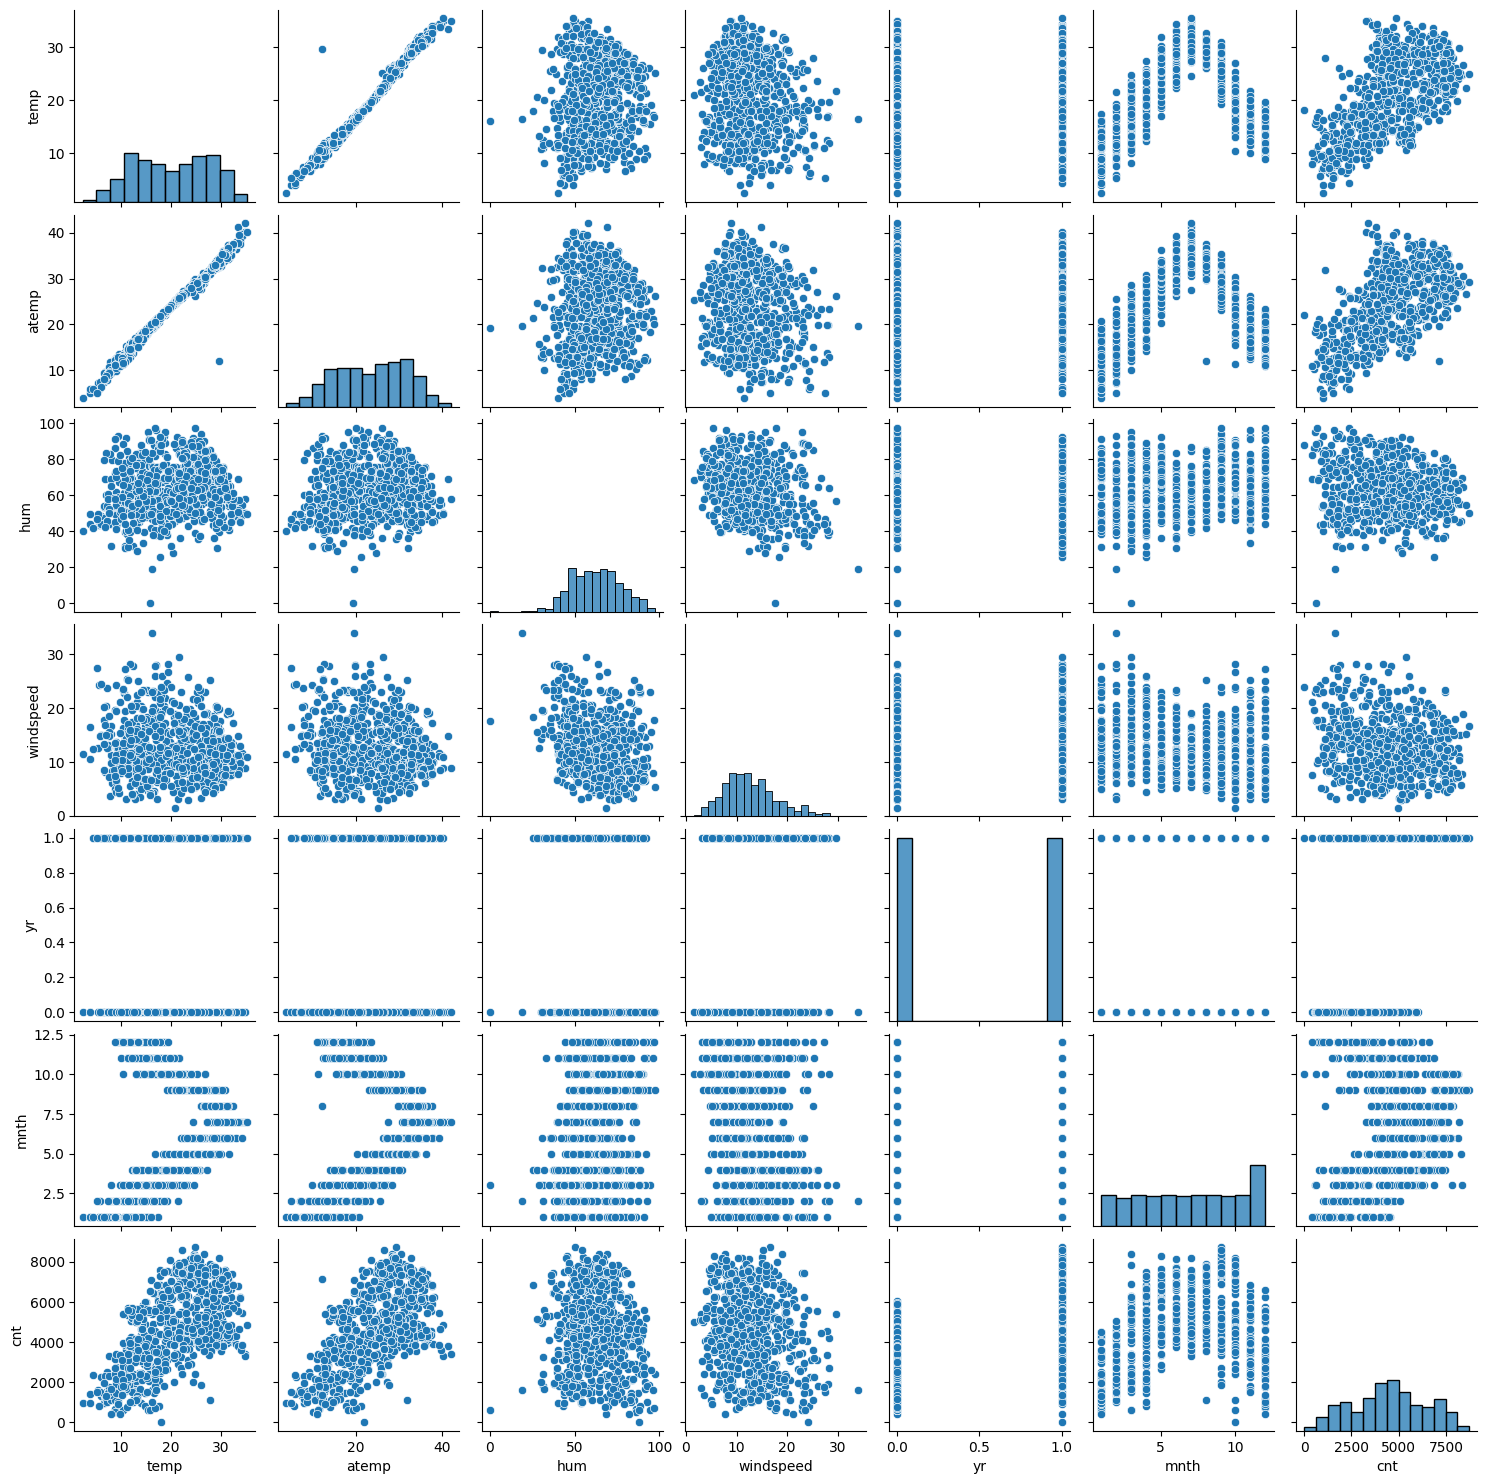

In [14]:
df_bike_int = df_bike[['temp', 'atemp', 'hum', 'windspeed', 'yr', 'mnth','cnt']]
g=sns.pairplot(df_bike_int)
g.fig.set_size_inches(15,15)
plt.show()

##### analysis - There is a colinearity between temp and feel temp - we will drop one of them after analysis and feature importance. 

#### Visualising Categorical Variables
#####  Let's make a boxplot for some of these variables.

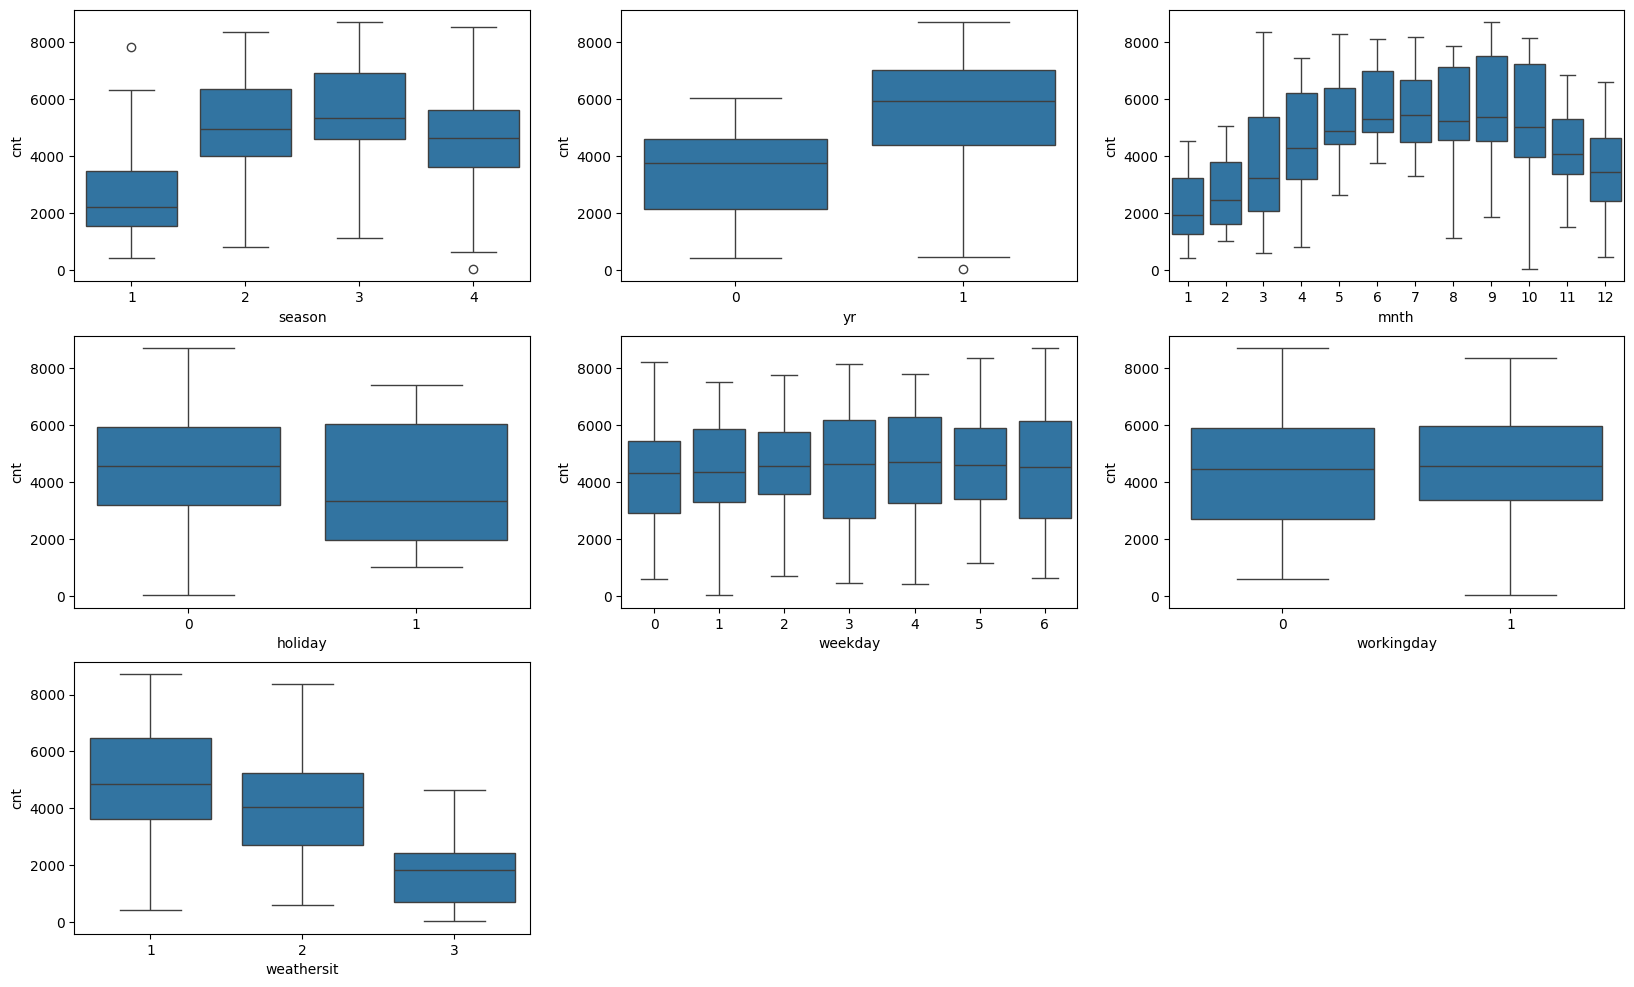

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike)

plt.show()

#### Analysis - There is impact on non-holidays, months, seasonal changes, weathersituation. 

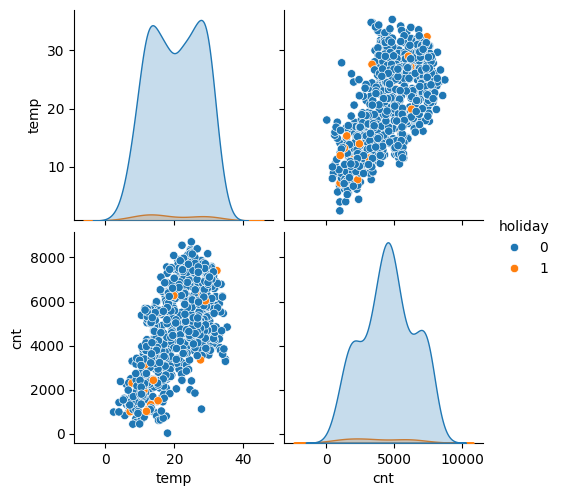

In [16]:
# Combine Numerical and Categorical variables by hue
df_hue_holiday = df_bike[['temp','cnt', 'holiday']]
sns.pairplot(df_hue_holiday, hue='holiday')
plt.show()

In [17]:
#plt.figure(figsize = (10, 5))
#sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = df_bike)
#plt.show()
print(df_bike.columns)


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


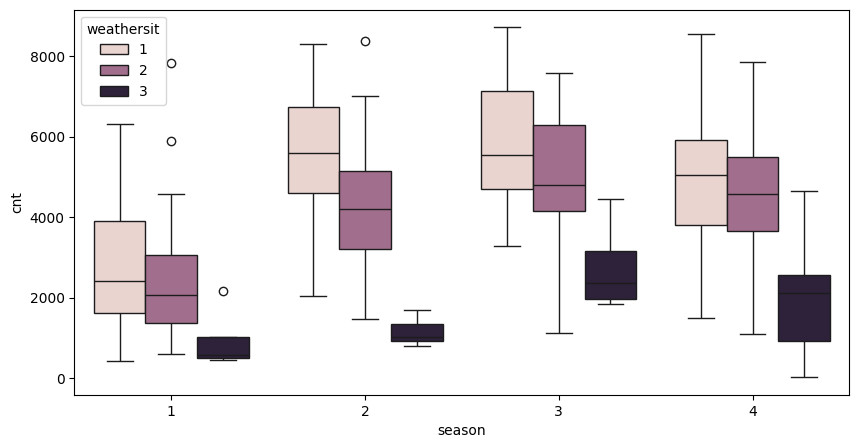

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='season', y='cnt', hue='weathersit', data=df_bike)
plt.show()

### Some more cleaning of data like -- 
##### instant which is just random index of record
##### Lets drop Registered and casual, cnt is just sum of these two - we will first analyse cnt against other variables.
##### dteday - already year and month are captured
##### temp - atemp is captured and .99 is correlation, so will keep one of it. 

In [19]:
df_bike = df_bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

## Step 3: Data Preparation

### Dummy Variables

The variables `season` `weathersit` `mnth` `weekday` has to be converted to dummy variables. 


In [20]:
#print(df_bike.columns)
df_bike.mnth = df_bike.mnth.map({1: 'Jan', 2: 'Feb',3: 'Mar', 4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'})
df_bike.season = df_bike.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
df_bike.weathersit = df_bike.weathersit.map({1:'Clear',2:'MistyCloudy', 
                                             3:'LightSnowRain',4:'HeavySnowRain'})
df_bike.weekday = df_bike.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [21]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,MistyCloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,MistyCloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'df_dummy'
df_dummy = df_bike[['season','mnth','weekday','weathersit']]
df_dummy = pd.get_dummies(df_dummy,drop_first=True, dtype=np.uint8)
# Adding the dummy variables to the original dataset
df_bike = pd.concat([df_dummy,df_bike],axis = 1)


In [23]:
df_bike.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,MistyCloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,MistyCloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
# Drop season weathersit mnth weekday as we have created the dummies for it

df_bike.drop(['season', 'weathersit', 'mnth', 'weekday'], axis = 1, inplace = True)

In [25]:
df_bike.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_LightSnowRain,weathersit_MistyCloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   season_Spring             730 non-null    uint8  
 1   season_Summer             730 non-null    uint8  
 2   season_Winter             730 non-null    uint8  
 3   mnth_Aug                  730 non-null    uint8  
 4   mnth_Dec                  730 non-null    uint8  
 5   mnth_Feb                  730 non-null    uint8  
 6   mnth_Jan                  730 non-null    uint8  
 7   mnth_Jul                  730 non-null    uint8  
 8   mnth_Jun                  730 non-null    uint8  
 9   mnth_Mar                  730 non-null    uint8  
 10  mnth_May                  730 non-null    uint8  
 11  mnth_Nov                  730 non-null    uint8  
 12  mnth_Oct                  730 non-null    uint8  
 13  mnth_Sep                  730 non-null    uint8  
 14  weekday_Mo

## Step 4: Splitting the Data into Training and Testing Sets



In [27]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
df_bike_train, df_bike_test = train_test_split(df_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
df_bike_train.shape

(510, 30)

In [29]:
df_bike_test.shape

(219, 30)

### Rescaling the Features of training Dataset
we will use MinMax scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
# Apply scaler() to all int for the training dataset - imp to training ds only.
num_vars = ['cnt','hum','windspeed','temp','atemp']

df_bike_train[num_vars] = scaler.fit_transform(df_bike_train[num_vars])


In [33]:
df_bike_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_LightSnowRain,weathersit_MistyCloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [34]:
df_bike_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_LightSnowRain,weathersit_MistyCloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


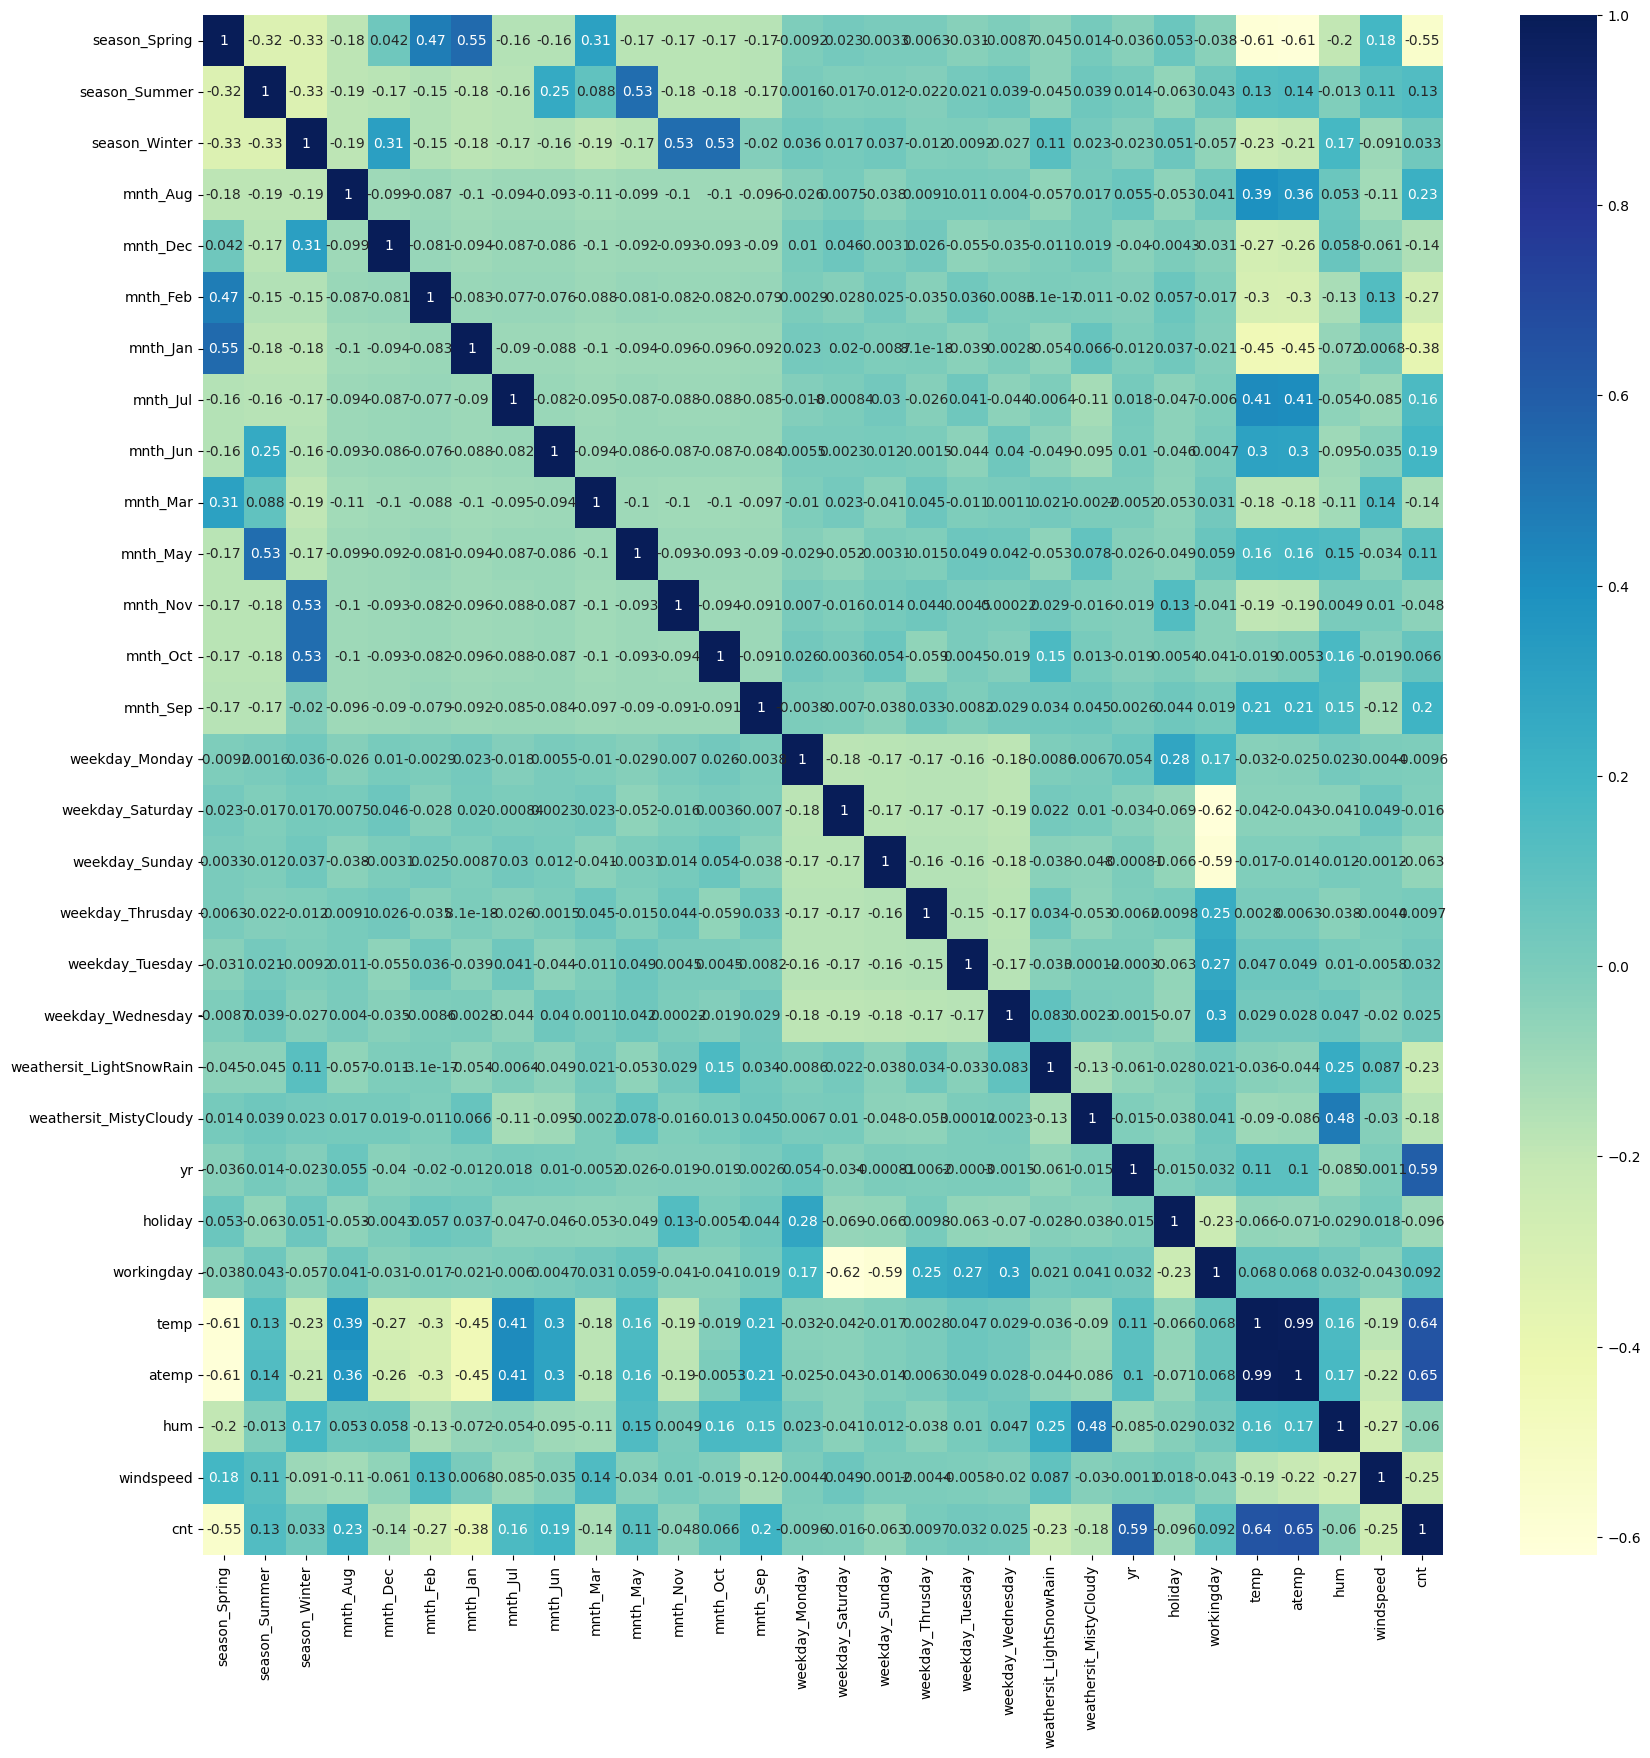

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(df_bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Analysis from above figure
* Temperature has highest impact. 
* There is a correlation with year, some factors/incidents that happened in the year matters. 
* Even slight rain has a -ve , season matters - fall has a very positive correlation. 
    That makes sense too, people would prefer covered vehicles in summer or during rain. 


### Dividing training dataset into X and Y sets for the model building

In [36]:
y_train = df_bike_train.pop('cnt')
X_train = df_bike_train

## Step 5: Building a linear model

First lets try with all features which are there post clean up

In [37]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [38]:
lr.params

const                       0.245237
season_Spring              -0.048580
season_Summer               0.038216
season_Winter               0.105387
mnth_Aug                    0.016076
mnth_Dec                   -0.045572
mnth_Feb                   -0.032176
mnth_Jan                   -0.062565
mnth_Jul                   -0.039277
mnth_Jun                   -0.001704
mnth_Mar                    0.001288
mnth_May                    0.024691
mnth_Nov                   -0.041783
mnth_Oct                    0.007695
mnth_Sep                    0.081806
weekday_Monday             -0.021502
weekday_Saturday            0.096059
weekday_Sunday              0.041527
weekday_Thrusday           -0.009750
weekday_Tuesday            -0.019308
weekday_Wednesday          -0.005733
weathersit_LightSnowRain   -0.256697
weathersit_MistyCloudy     -0.061030
yr                          0.232208
holiday                     0.010689
workingday                  0.096962
temp                        0.401322
a

In [39]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          8.42e-181
Time:                        22:30:33   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Observations - Overall Interpretation
* The model explains 85% of the variance in the dependent variable (cnt), indicating a good fit.
* The Adjusted R-squared (0.84) is very close to the R-squared, suggesting that the model's complexity is justified by the data.
* The F-statistic (103.8) and its associated p-value (8.74e-182) indicate that the model is highly significant.
* The AIC and BIC values are negative, which is typical for log-likelihood measures in well-fitted models. Lower values generally indicate better models.
* The number of observations (510) and the degrees of freedom (482 residuals, 27 model) suggest a robust sample size and a model that isn't overly complex.
* **In summary, the OLS regression model appears to be a strong model with a good fit, as indicated by the high R-squared and adjusted R-squared values, significant F-statistic, and favorable AIC/BIC values.** 


### Checking VIF

In [40]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,workingday,85.60
25,temp,67.12
26,atemp,56.09
15,weekday_Saturday,19.72
16,weekday_Sunday,18.35
0,season_Spring,10.80
2,season_Winter,9.52
1,season_Summer,8.31
11,mnth_Nov,6.80
12,mnth_Oct,6.59


#### High VIF, clearly we need to drop some columns

### Lets try feature elimination with RFE, There are 28 columns, we'll limit to 20

In [41]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Running RFE with the output number of the variable equal to 20
lmsk = LinearRegression()
lmsk.fit(X_train, y_train)

rfe = RFE(estimator=lmsk, n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', np.True_, np.int64(1)),
 ('season_Summer', np.True_, np.int64(1)),
 ('season_Winter', np.True_, np.int64(1)),
 ('mnth_Aug', np.False_, np.int64(3)),
 ('mnth_Dec', np.True_, np.int64(1)),
 ('mnth_Feb', np.True_, np.int64(1)),
 ('mnth_Jan', np.True_, np.int64(1)),
 ('mnth_Jul', np.True_, np.int64(1)),
 ('mnth_Jun', np.False_, np.int64(8)),
 ('mnth_Mar', np.False_, np.int64(6)),
 ('mnth_May', np.True_, np.int64(1)),
 ('mnth_Nov', np.True_, np.int64(1)),
 ('mnth_Oct', np.False_, np.int64(10)),
 ('mnth_Sep', np.True_, np.int64(1)),
 ('weekday_Monday', np.False_, np.int64(5)),
 ('weekday_Saturday', np.True_, np.int64(1)),
 ('weekday_Sunday', np.True_, np.int64(1)),
 ('weekday_Thrusday', np.False_, np.int64(9)),
 ('weekday_Tuesday', np.False_, np.int64(4)),
 ('weekday_Wednesday', np.False_, np.int64(7)),
 ('weathersit_LightSnowRain', np.True_, np.int64(1)),
 ('weathersit_MistyCloudy', np.True_, np.int64(1)),
 ('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)

In [43]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_LightSnowRain',
       'weathersit_MistyCloudy', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_Oct', 'weekday_Monday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe)

In [47]:
lmrfe = sm.OLS(y_train,X_train_rfe_lm).fit()   # Running the linear model

In [48]:
#Let's see the summary of our linear model
print(lmrfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.59e-189
Time:                        22:30:40   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [49]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,workingday,60.93
10,weekday_Saturday,14.59
11,weekday_Sunday,13.91
0,season_Spring,5.79
17,temp,4.88
2,season_Winter,3.88
1,season_Summer,3.49
15,holiday,3.43
5,mnth_Jan,2.38
18,hum,1.97


In [50]:
#### Still high vif, so lets drop a few more

In [51]:
# Running RFE with the output number of the variable equal to 16
lmsk2 = LinearRegression()
lmsk2.fit(X_train_rfe, y_train)

rfe = RFE(estimator=lmsk2, n_features_to_select=16)             # running RFE
rfe = rfe.fit(X_train_rfe, y_train)

list(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_))

[('season_Spring', np.True_, np.int64(1)),
 ('season_Summer', np.True_, np.int64(1)),
 ('season_Winter', np.True_, np.int64(1)),
 ('mnth_Dec', np.False_, np.int64(2)),
 ('mnth_Feb', np.False_, np.int64(3)),
 ('mnth_Jan', np.True_, np.int64(1)),
 ('mnth_Jul', np.True_, np.int64(1)),
 ('mnth_May', np.False_, np.int64(4)),
 ('mnth_Nov', np.True_, np.int64(1)),
 ('mnth_Sep', np.True_, np.int64(1)),
 ('weekday_Saturday', np.True_, np.int64(1)),
 ('weekday_Sunday', np.False_, np.int64(5)),
 ('weathersit_LightSnowRain', np.True_, np.int64(1)),
 ('weathersit_MistyCloudy', np.True_, np.int64(1)),
 ('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1))]

In [52]:
col = X_train_rfe.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_LightSnowRain', 'weathersit_MistyCloudy', 'yr', 'holiday',
       'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [53]:
X_train_rfe.columns[~rfe.support_]

Index(['mnth_Dec', 'mnth_Feb', 'mnth_May', 'weekday_Sunday'], dtype='object')

In [54]:
X_train_rfe2 = X_train_rfe[col]
X_train_rfe2_lm = sm.add_constant(X_train_rfe2)
lmrfe2 = sm.OLS(y_train,X_train_rfe2_lm).fit()   # Running the linear model
print(lmrfe2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.10e-190
Time:                        22:30:42   Log-Likelihood:                 520.99
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [55]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,hum,29.47
13,temp,17.90
12,workingday,5.32
15,windspeed,4.78
0,season_Spring,4.57
2,season_Winter,3.87
1,season_Summer,2.85
9,weathersit_MistyCloudy,2.29
10,yr,2.09
7,weekday_Saturday,1.98


In [56]:
# Running RFE with the output number of the variable equal to 12
lmsk3 = LinearRegression()
lmsk3.fit(X_train_rfe2, y_train)

rfe = RFE(estimator=lmsk3, n_features_to_select=12)             # running RFE
rfe = rfe.fit(X_train_rfe2, y_train)

list(zip(X_train_rfe2.columns,rfe.support_,rfe.ranking_))

[('season_Spring', np.True_, np.int64(1)),
 ('season_Summer', np.True_, np.int64(1)),
 ('season_Winter', np.True_, np.int64(1)),
 ('mnth_Jan', np.False_, np.int64(4)),
 ('mnth_Jul', np.True_, np.int64(1)),
 ('mnth_Nov', np.False_, np.int64(5)),
 ('mnth_Sep', np.True_, np.int64(1)),
 ('weekday_Saturday', np.False_, np.int64(2)),
 ('weathersit_LightSnowRain', np.True_, np.int64(1)),
 ('weathersit_MistyCloudy', np.True_, np.int64(1)),
 ('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.False_, np.int64(3)),
 ('temp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1))]

In [57]:
col = X_train_rfe2.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weathersit_LightSnowRain', 'weathersit_MistyCloudy', 'yr',
       'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [58]:
X_train_rfe2.columns[~rfe.support_]

Index(['mnth_Jan', 'mnth_Nov', 'weekday_Saturday', 'workingday'], dtype='object')

In [59]:
X_train_rfe3 = X_train_rfe2[col]
X_train_rfe3_lm = sm.add_constant(X_train_rfe3)
lmrfe3 = sm.OLS(y_train,X_train_rfe3_lm).fit()   # Running the linear model
print(lmrfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.69e-190
Time:                        22:30:43   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [60]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,28.06
9,temp,16.02
11,windspeed,4.65
0,season_Spring,4.01
2,season_Winter,3.35
1,season_Summer,2.78
6,weathersit_MistyCloudy,2.28
7,yr,2.08
3,mnth_Jul,1.58
4,mnth_Sep,1.38


In [61]:
####  Lets just drop humidity and see as it has very high VIF and p value

In [62]:
X_train_4 = X_train_rfe3.drop(['hum'], axis=1)
X_train_4_lm = sm.add_constant(X_train_4)

In [63]:
lmrfe4 = sm.OLS(y_train,X_train_4_lm).fit()   # Running the linear model
print(lmrfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.40e-187
Time:                        22:30:43   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [64]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,season_Summer,2.21
0,season_Spring,2.08
7,yr,2.07
2,season_Winter,1.79
3,mnth_Jul,1.58
6,weathersit_MistyCloudy,1.55
4,mnth_Sep,1.34
5,weathersit_LightSnowRain,1.08


### Observations - Overall Interpretation based on OLS Regression results and VIF values
The OLS regression results and VIF values provide a comprehensive understanding of the model and feature selection.

#### Model Performance:

R-squared: 0.836, indicating that 83.6% of the variability in the dependent variable (cnt) is explained by the model.
Adj. R-squared: 0.832, slightly lower, adjusting for the number of predictors.
F-statistic: 230.4 with a p-value of 2.40e-187, indicating the model is statistically significant.
Key Coefficients:

#### Positive Influence:
season_Summer (0.0453), season_Winter (0.0831), mnth_Sep (0.0767), yr (0.2335), temp (0.4915) are significant positive predictors.
#### Negative Influence:
season_Spring (-0.0669), mnth_Jul (-0.0524), weathersit_LightSnowRain (-0.2852), weathersit_MistyCloudy (-0.0816), holiday (-0.0980), windspeed (-0.1480) are significant negative predictors.
Multicollinearity Check (VIF values):

#### All VIF values are below 10, indicating no significant multicollinearity.
Highest VIF values are for temp (5.09) and windspeed (4.60), which are within acceptable limits.
Other predictors have VIF values ranging from 1.04 to 2.21, indicating low multicollinearity.
Overall, the model demonstrates strong explanatory power with no severe multicollinearity issues among the predictors.








## Step 6: Residual Analysis of the training data

In [65]:
y_train_cnt = lmrfe4.predict(X_train_4_lm)

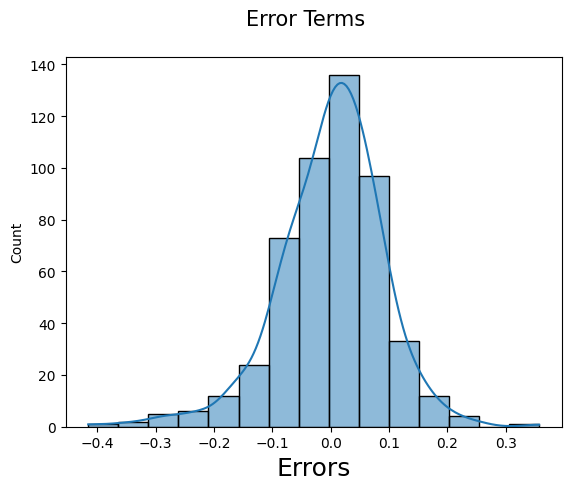

In [66]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_cnt), bins = 15, kde=True)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

#### Observations from error plot  - Centered around zero, Normally distributed as expected satisfying Linear regression assumptions

#### Looking for patterns in the residuals (homoscedasticity)

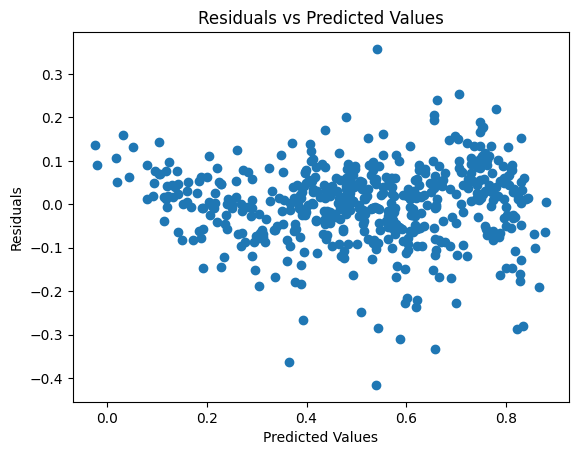

In [67]:
res = (y_train - y_train_cnt)
# Plot the residuals
plt.scatter(y_train_cnt, res)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

#### Observations from plot  - No pattern, homoscedasticity holds

## Step 7: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model

#### Scale the test dataset

In [68]:
df_bike_test[num_vars] = scaler.fit_transform(df_bike_test[num_vars])

In [69]:
df_bike_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_LightSnowRain,weathersit_MistyCloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [70]:
y_test = df_bike_test.pop('cnt')
X_test = df_bike_test

#### Predicting using values used by the final model

In [71]:
final_features = X_train_4.columns
final_features

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weathersit_LightSnowRain', 'weathersit_MistyCloudy', 'yr',
       'holiday', 'temp', 'windspeed'],
      dtype='object')

In [72]:
X_test=X_test[final_features]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     219 non-null    float64
 1   season_Spring             219 non-null    uint8  
 2   season_Summer             219 non-null    uint8  
 3   season_Winter             219 non-null    uint8  
 4   mnth_Jul                  219 non-null    uint8  
 5   mnth_Sep                  219 non-null    uint8  
 6   weathersit_LightSnowRain  219 non-null    uint8  
 7   weathersit_MistyCloudy    219 non-null    uint8  
 8   yr                        219 non-null    int64  
 9   holiday                   219 non-null    int64  
 10  temp                      219 non-null    float64
 11  windspeed                 219 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [73]:
## Making predictions

y_pred = lmrfe4.predict(X_test)

## Step 8: Model Evaluation
Plot actual vs predicted to visualize the variation

Text(0, 0.5, 'y_pred')

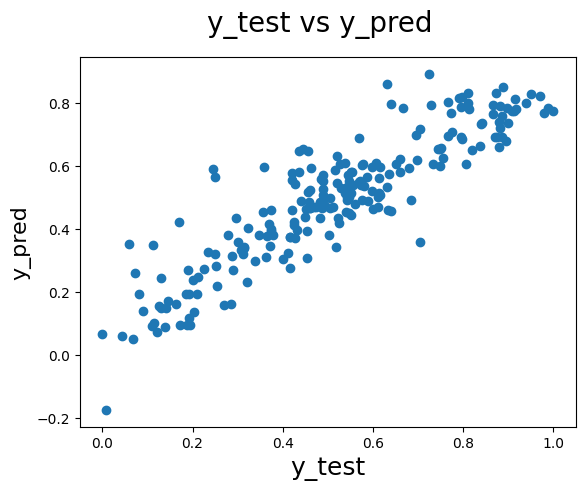

In [74]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

#### Above graph helps us understand predictions are good.
We can see that the equation of our best fitted line is:

$ count = .1996 + 0.4915 \times temperature - .0669 \times  SeasonSpring + 0.0453  \times  SeasonSummer + 0.0831 \times seasonWinter  - 0.0524 \times mnthJul + 0.0767 \times mnthSep - 0.2852 \times weatherLightSnowRain - 0.0816 \times weatherMistyCloudy + 0.2335  \times year - 0.0980 \times holiday - 0.1480 \times windspeed $

## Based on the OLS regression results, here are some key recommendations for the bike-sharing company:

#### Seasonal Strategy
Winter and Summer Promotions:
The coefficients for season_Winter (0.0831) and season_Summer (0.0453) are positive and significant, suggesting higher usage during these seasons. Implement targeted promotions and increase bike availability during these periods to capitalize on higher demand.
Spring Awareness Campaign:
The coefficient for season_Spring (-0.0669) is negative and significant, indicating lower usage. Consider running awareness campaigns or special offers to boost ridership in spring.

#### Monthly Insights
September Campaigns:
The coefficient for mnth_Sep (0.0767) is positive and significant, indicating higher usage. Increase marketing efforts and ensure adequate bike supply in September to maximize benefits.
July Adjustments:
The coefficient for mnth_Jul (-0.0524) is negative and significant. Investigate potential reasons for lower ridership in July (e.g., weather conditions, vacation periods) and adjust strategies accordingly, 
such as offering discounts or special events.

#### Weather-Related Adjustments
Adverse Weather Preparation:
The coefficients for weathersit_LightSnowRain (-0.2852) and weathersit_MistyCloudy (-0.0816) are negative and significant, indicating lower ridership during adverse weather conditions. 
Develop strategies to mitigate the impact, such as offering promotions during bad weather, 
offering/improving weather-resistant clothing and equipments etc along with rides, and also providing real-time weather updates to users.

#### Yearly Trends
Leverage Positive Yearly Growth:
The coefficient for yr (0.2335) is highly positive and significant, suggesting increasing usage over time. Continue to invest in expanding the bike-sharing program and improving user experience to sustain and enhance this growth.

#### Holiday and Temperature Effects
Holiday Specials:
The coefficient for holiday (-0.0980) is negative and significant, indicating lower usage on holidays. Introduce holiday-specific promotions or events to encourage ridership on these days.
Temperature Optimization:
The coefficient for temp (0.4915) is highly positive and significant, showing that ridership increases with temperature. Ensure bikes are available and maintainable during warmer periods, and consider introducing temperature-based dynamic pricing to incentivize use during less favorable conditions.

#### Wind Speed Considerations
Wind Speed Impact:
The coefficient for windspeed (-0.1480) is negative and significant, suggesting that higher wind speeds deter riders. Provide information about wind conditions and possibly offer incentives or alternative transportation options on windy days.

#### Overall Recommendations
Continuous Monitoring and Analysis:
Regularly monitor ridership data and update the regression model to adapt to changing trends and patterns. Use data-driven insights to refine marketing and operational strategies.





